In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
dataset = pd.read_csv("/content/dataset.csv")
dataset.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Mumbai,-0.209082,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Mumbai,-0.173647,1.0,2.0,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Mumbai,-0.210215,1.0,3.0,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Mumbai,-0.202731,1.0,4.0,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Mumbai,-0.192487,1.0,2.0,Dry,NaN,Urban,NaN,Other vehicle


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

 # Data Cleaning and Preprocessing

In [ ]:
# checking missing values
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,1
Number_of_Casualties,1
Number_of_Vehicles,1
Road_Surface_Conditions,175


In [ ]:
# using mean, median and mode value imputation
dataset['Road_Surface_Conditions'] = dataset['Road_Surface_Conditions'].fillna(dataset['Road_Surface_Conditions'].mode().iloc[0])



In [ ]:
dataset['Road_Type'] = dataset['Road_Type'].fillna(dataset['Road_Type'].mode().iloc[0])

In [ ]:
dataset['Weather_Conditions'] = dataset['Weather_Conditions'].fillna(dataset['Weather_Conditions'].mode().iloc[0])

In [ ]:
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,1
Number_of_Casualties,1
Number_of_Vehicles,1
Road_Surface_Conditions,0


In [ ]:
# mean value imputation
dataset['Longitude'] = dataset['Longitude'].fillna(dataset['Longitude'].mean())
dataset['Number_of_Casualties'] = dataset['Number_of_Casualties'].fillna(dataset['Number_of_Casualties'].mean())
dataset['Number_of_Vehicles'] = dataset['Number_of_Vehicles'].fillna(dataset['Number_of_Vehicles'].mean())
dataset['Urban_or_Rural_Area'] = dataset['Urban_or_Rural_Area'].fillna(dataset['Urban_or_Rural_Area'].mode().iloc[0])
dataset['Vehicle_Type'] = dataset['Vehicle_Type'].fillna(dataset['Vehicle_Type'].mode().iloc[0])


In [ ]:
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,0
Number_of_Casualties,0
Number_of_Vehicles,0
Road_Surface_Conditions,0


In [ ]:
dataset.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,97535.000000,97535.000000,97535.000000,97535.000000
mean,52.949345,-1.423744,1.365339,1.834673
std,1.018407,0.953069,0.830961,0.696781
min,51.292694,-3.599412,1.000000,1.000000
25%,52.192860,-2.158090,1.000000,1.000000
50%,53.103428,-1.533747,1.000000,2.000000
75%,53.634488,-0.368630,1.000000,2.000000
max,55.785544,0.350513,40.000000,14.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97535 entries, 0 to 97534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    97535 non-null  object 
 1   Accident_Severity        97535 non-null  object 
 2   Accident Date            97535 non-null  object 
 3   Latitude                 97535 non-null  float64
 4   Light_Conditions         97535 non-null  object 
 5   District Area            97535 non-null  object 
 6   Longitude                97535 non-null  float64
 7   Number_of_Casualties     97535 non-null  float64
 8   Number_of_Vehicles       97535 non-null  float64
 9   Road_Surface_Conditions  97535 non-null  object 
 10  Road_Type                97535 non-null  object 
 11  Urban_or_Rural_Area      97535 non-null  object 
 12  Weather_Conditions       97535 non-null  object 
 13  Vehicle_Type             97535 non-null  object 
dtypes: float64(4), object(

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Mumbai,-0.209082,1.000000,2.000000,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Mumbai,-0.173647,1.000000,2.000000,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Mumbai,-0.210215,1.000000,3.000000,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Mumbai,-0.202731,1.000000,4.000000,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Mumbai,-0.192487,1.000000,2.000000,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97530,2010000000000,Slight,2019-08-29,52.654498,Daylight,Chhindwara,-1.137373,1.000000,1.000000,Dry,Dual carriageway,Urban,Fine no high winds,Car
97531,2010000000000,Slight,2019-08-28,52.651503,Daylight,Chhindwara,-1.121171,1.000000,2.000000,Dry,Single carriageway,Urban,Fine no high winds,Car
97532,2010000000000,Slight,2019-08-29,52.716023,Daylight,Ujjain,-1.105367,1.000000,2.000000,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle 50cc and under
97533,2010000000000,Slight,2019-08-30,52.496985,Daylight,Murwara,-1.255946,1.000000,2.000000,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over


# EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97535 entries, 0 to 97534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    97535 non-null  object 
 1   Accident_Severity        97535 non-null  object 
 2   Accident Date            97535 non-null  object 
 3   Latitude                 97535 non-null  float64
 4   Light_Conditions         97535 non-null  object 
 5   District Area            97535 non-null  object 
 6   Longitude                97535 non-null  float64
 7   Number_of_Casualties     97535 non-null  float64
 8   Number_of_Vehicles       97535 non-null  float64
 9   Road_Surface_Conditions  97535 non-null  object 
 10  Road_Type                97535 non-null  object 
 11  Urban_or_Rural_Area      97535 non-null  object 
 12  Weather_Conditions       97535 non-null  object 
 13  Vehicle_Type             97535 non-null  object 
dtypes: float64(4), object(

In [ ]:
dataset.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,97535.000000,97535.000000,97535.000000,97535.000000
mean,52.949345,-1.423744,1.365339,1.834673
std,1.018407,0.953069,0.830961,0.696781
min,51.292694,-3.599412,1.000000,1.000000
25%,52.192860,-2.158090,1.000000,1.000000
50%,53.103428,-1.533747,1.000000,2.000000
75%,53.634488,-0.368630,1.000000,2.000000
max,55.785544,0.350513,40.000000,14.000000


In [ ]:
dataset.size

1365490

In [ ]:
dataset.shape

(97535, 14)

In [ ]:
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,0
Number_of_Casualties,0
Number_of_Vehicles,0
Road_Surface_Conditions,0


In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates(inplace = True)
dataset.duplicated().sum()

0

data visualization

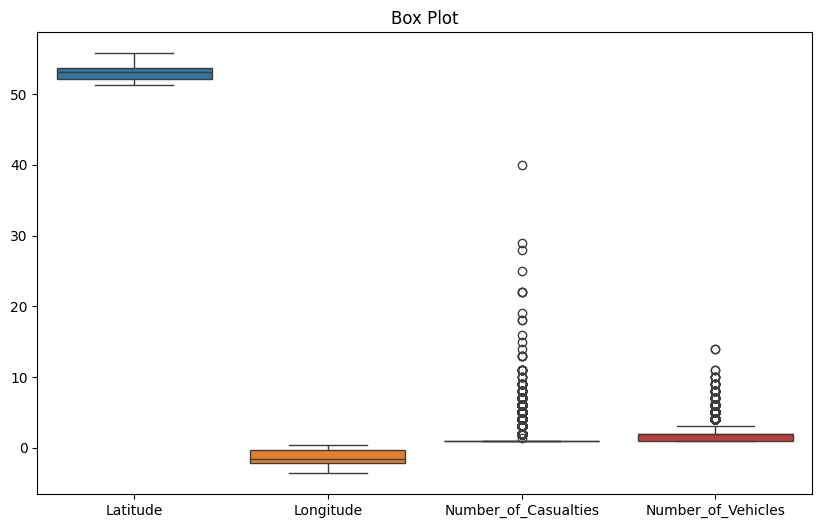

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset)
plt.title("Box Plot")
plt.show()

-> Their are too many outliers in number of casualities and number of vehicles

In [ ]:
# As thier are too many outliers we will transform the data to reduce the effect of outliers
dataset['Number_of_Casualties'] = np.log1p(dataset['Number_of_Casualties'])
dataset['Number_of_Vehicles'] = np.log1p(dataset['Number_of_Vehicles'])

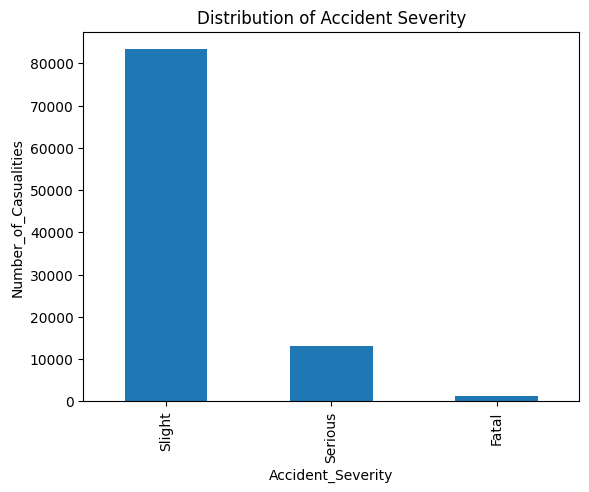

In [ ]:
# visualizing time series data
# Plot the distribution of accident severity
dataset['Accident_Severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident_Severity')
plt.ylabel('Number_of_Casualities')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
scaled_data = dataset[numerical_features]
sacled_data = scaled_data.values

In [ ]:
# # Extract day of the week from the date
# dataset['Day_of_Week'] = dataset['Accident Date'].dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
import pandas as pd

# Convert 'Accident Date' column to datetime
dataset['Accident Date'] = pd.to_datetime(dataset['Accident Date'])

# Now you can extract the day of the week
dataset['Day_of_Week'] = dataset['Accident Date'].dt.dayofweek

In [ ]:
print(f"Scaled data type: {type(scaled_data)}")
print(f"Scaled data shape: {scaled_data.shape}")


Scaled data type: <class 'pandas.core.frame.DataFrame'>
Scaled data shape: (97534, 4)


In [ ]:
def create_sequences(dataset, seq_length):
    X, y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i + seq_length])
        y.append(dataset[i + seq_length])
    return np.array(X), np.array(y)

# Assuming scaled_data is a DataFrame with a single column
scaled_data = scaled_data.iloc[:, 0].values  # Extract the column as a NumPy array


In [ ]:
seq_length = 10  # Example sequence length
X, y = create_sequences(scaled_data, seq_length)

# Train Test Split

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with validation data
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0039 - val_loss: 7.8126e-04
Epoch 2/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 4.2605e-04 - val_loss: 6.9885e-04
Epoch 3/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 3.8639e-04 - val_loss: 7.2469e-04
Epoch 4/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 3.9680e-04 - val_loss: 7.6047e-04
Epoch 5/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 3.8059e-04 - val_loss: 6.7895e-04
Epoch 6/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 3.8131e-04 - val_loss: 8.3014e-04
Epoch 7/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 3.7198e-04 - val_loss: 6.7945e-04
Epoch 8/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 3.5826e-04 - val_loss: 7.7274e-04
Epoch 9/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 3.7340e-04 - val_loss: 6.8019e-04
Epoch 10/25
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 3.5704e-04 - val_loss: 6.7358e-04
Epoch 11/25
2439/2439 ━━━━━━━━━━━

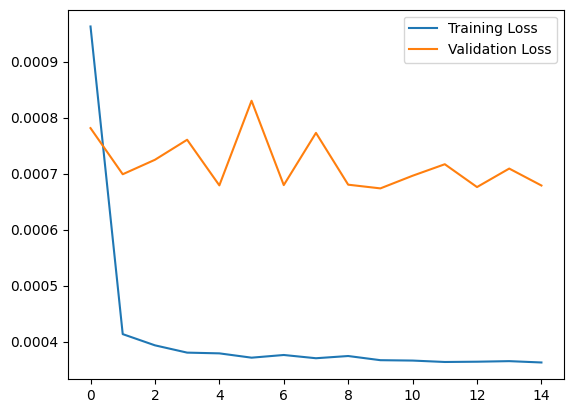

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## HyperParameter tuning

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [48]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Tuning the number of units in the LSTM layers
    model.add(LSTM(
        units=hp.Int('units_layer1', min_value=32, max_value=128, step=16),
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(LSTM(
        units=hp.Int('units_layer2', min_value=32, max_value=128, step=16)
    ))
    model.add(Dense(units=1))

    # Tuning the optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Define the tuner with a limited number of trials
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',   # Minimize validation loss
    max_trials=15,          # Limit to 20 trials
    executions_per_trial=1, # Train each configuration once
    directory='random_search_tuning',
    project_name='lstm_tuning'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32)

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

# Print the best hyperparameters
print(f"""
The optimal number of units in the first LSTM layer is {best_hps.get('units_layer1')}.
The optimal number of units in the second LSTM layer is {best_hps.get('units_layer2')}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")


Trial 15 Complete [00h 01m 27s]
val_loss: 0.00022731929493602365

Best val_loss So Far: 0.00022211218310985714
Total elapsed time: 00h 17m 53s
Epoch 1/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0027 - val_loss: 2.4617e-04
Epoch 2/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 4.7038e-04 - val_loss: 2.2675e-04
Epoch 3/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 4.4120e-04 - val_loss: 3.2015e-04
Epoch 4/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 4.3663e-04 - val_loss: 2.4174e-04
Epoch 5/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 4.2509e-04 - val_loss: 2.2762e-04
Epoch 6/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 4.1183e-04 - val_loss: 2.5712e-04
Epoch 7/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 4.3033e-04 - val_loss: 2.6285e-04
Epoch 8/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 4.1320e-04 - val_loss: 2.2396e-04
Epoch 9/15
1951/1951 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 3.9739e-04 - val_loss:

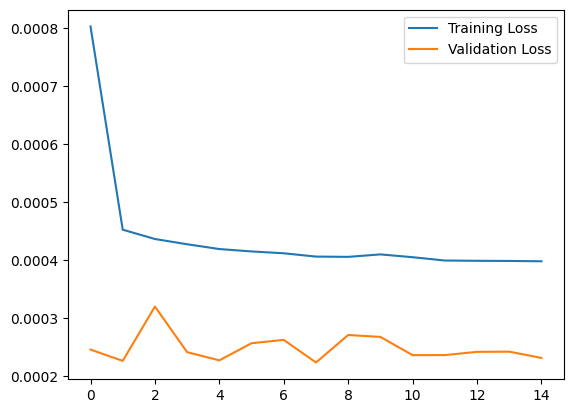

In [49]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# the model appears to be performing well. The training loss and validation loss are both decreasing and staying close to each other, which indicates that the model is learning effectively and generalizing well to the validation data. There is no sign of overfitting or underfitting in this graph

610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0006972044894286798
Mean Absolute Error: 0.019411372191771574


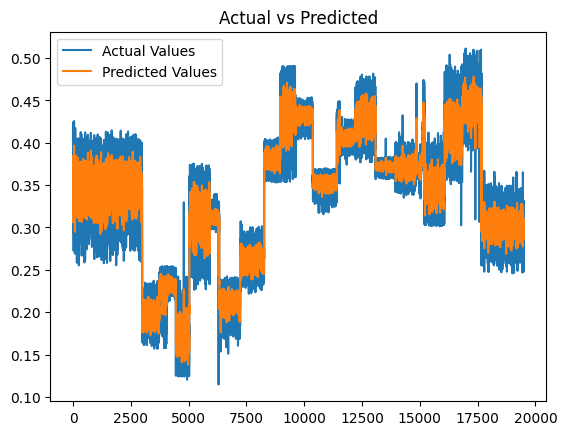

In [51]:
# Make predictions
predictions = best_model.predict(X_test)

# Evaluate predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.plot(y_test, label="Actual Values")
plt.plot(predictions, label="Predicted Values")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()


Model saved!
Model loaded!
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0006972044894286798
Mean Absolute Error: 0.019411372191771574


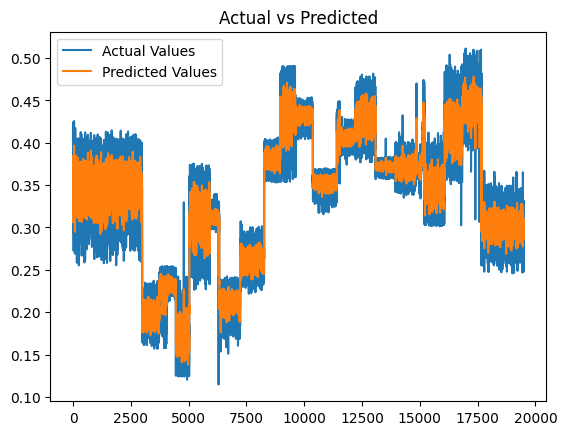

In [56]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Save the model
best_model.save('best_lstm_model.h5')
print("Model saved!")

# Load the model later
loaded_model = load_model('best_lstm_model.h5')
print("Model loaded!")

# Example Test Data (Ensure the shape matches your input shape)
# Assuming X_test is preprocessed the same way as X_train
predictions = loaded_model.predict(X_test)

# Evaluate predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot predictions vs actual values
plt.plot(y_test, label="Actual Values")
plt.plot(predictions, label="Predicted Values")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()


# Random Forest

In [94]:
# Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the dataset
dataset = pd.read_csv('/content/dataset.csv', parse_dates=['Accident Date'])

# Feature Engineering: Extract Day of the Week from the Accident Date
dataset['Day_of_Week'] = dataset['Accident Date'].dt.dayofweek

# One-hot encoding for categorical features
dataset = pd.get_dummies(dataset, columns=['Weather_Conditions'], drop_first=True)

# Specify target variable and columns to drop
target = "Accident_Severity"
columns_to_drop = ['Accident Date', 'Index']  # Add any other irrelevant columns here

# Separate features (Xr) and target (yr)
Xr = dataset.drop(columns=columns_to_drop + [target])
yr = dataset[target]

# Handle missing values
# Separate numeric and non-numeric columns
numeric_columns = Xr.select_dtypes(include=['number']).columns
non_numeric_columns = Xr.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
Xr[numeric_columns] = Xr[numeric_columns].fillna(Xr[numeric_columns].mean())

# Fill missing values for non-numeric columns with the mode
for col in non_numeric_columns:
    Xr[col] = Xr[col].fillna(Xr[col].mode()[0])

# Encode all non-numeric columns in Xr
for col in non_numeric_columns:
    le = LabelEncoder()
    Xr[col] = le.fit_transform(Xr[col])

# Encode the target variable
label_encoder = LabelEncoder()
yr_encoded = label_encoder.fit_transform(yr)

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr_encoded, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(Xr_train, yr_train)

# Make predictions
rf_predictions = rf_model.predict(Xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, rf_predictions)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(yr_test, rf_predictions, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(yr_test, rf_predictions))

# Save the model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved as '{model_filename}'")

# Reload the model for predictions
loaded_model = joblib.load(model_filename)
new_predictions = loaded_model.predict(Xr_test)

# Verify predictions from the saved model
new_accuracy = accuracy_score(yr_test, new_predictions)
print(f"New Predictions Accuracy: {new_accuracy:.2f}")


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.07      0.00      0.01       247
     Serious       0.18      0.03      0.05      2479
      Slight       0.86      0.98      0.92     16781

    accuracy                           0.85     19507
   macro avg       0.37      0.34      0.32     19507
weighted avg       0.77      0.85      0.80     19507

Confusion Matrix:
[[    1     7   239]
 [    4    70  2405]
 [   10   305 16466]]
Model saved as 'random_forest_model.pkl'
New Predictions Accuracy: 0.85


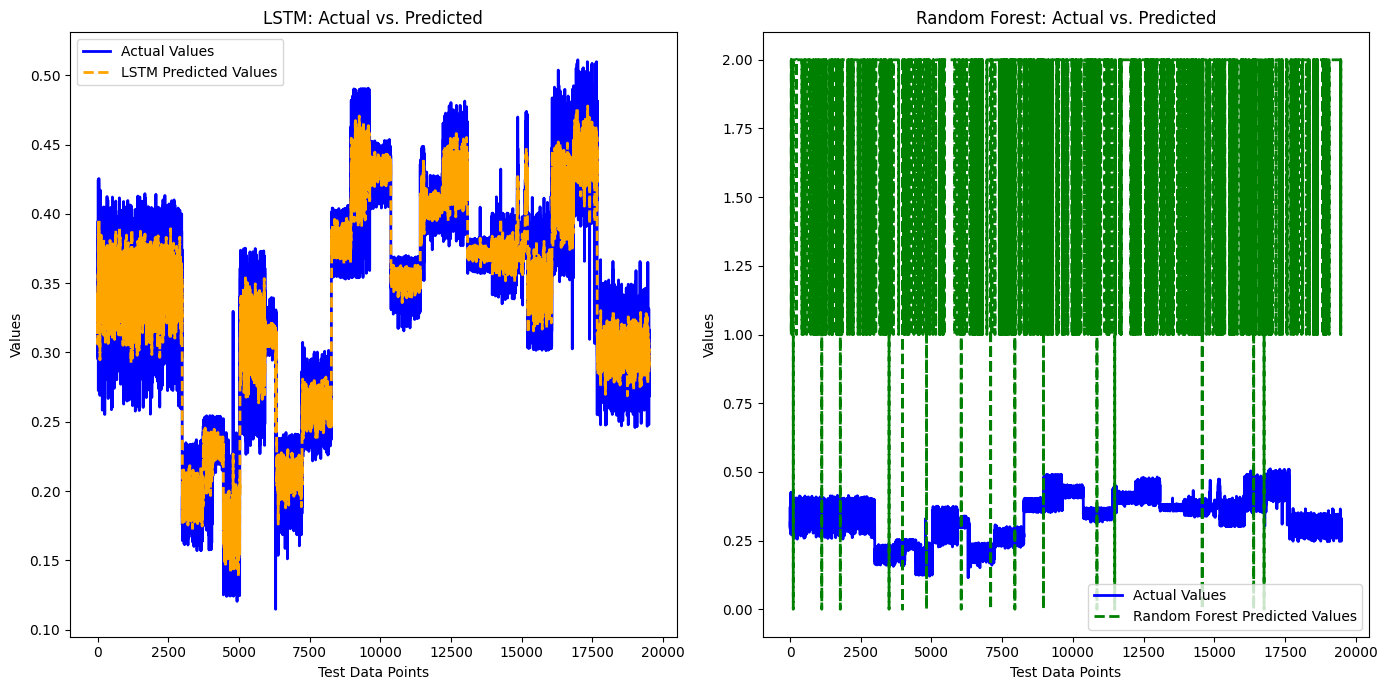

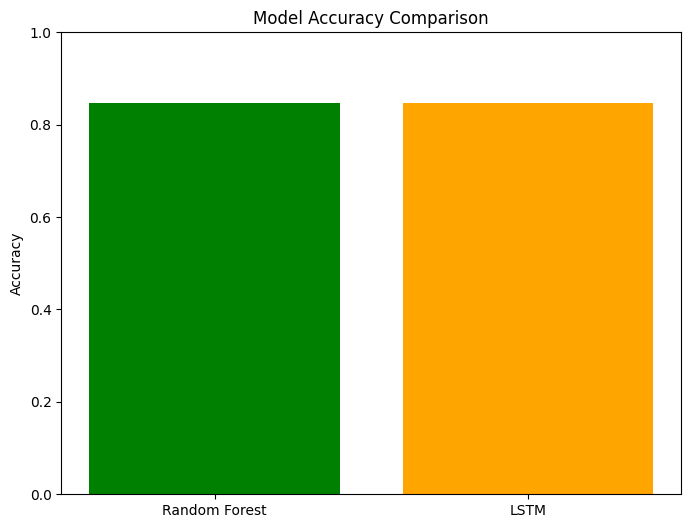

Random Forest Accuracy: 0.85
LSTM Mean Squared Error: 0.00
LSTM Mean Absolute Error: 0.02
LSTM performs better.


In [95]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Assuming the Random Forest and LSTM models are already loaded and predictions are done

# 1. Plotting Actual vs Predicted Values for Both Models

# Plot LSTM Predictions vs Actual Values
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(y_test, label="Actual Values", color='blue', linestyle='-', linewidth=2)
plt.plot(predictions, label="LSTM Predicted Values", color='orange', linestyle='--', linewidth=2)
plt.title('LSTM: Actual vs. Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.legend()

# Plot Random Forest Predictions vs Actual Values
plt.subplot(1, 2, 2)
plt.plot(y_test, label="Actual Values", color='blue', linestyle='-', linewidth=2)
plt.plot(rf_predictions, label="Random Forest Predicted Values", color='green', linestyle='--', linewidth=2)
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Accuracy Comparison Bar Plot
accuracies = [accuracy, accuracy_score(yr_test, rf_predictions)]
model_names = ['Random Forest', 'LSTM']

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# 3. Print Performance Metrics

# Random Forest: Accuracy
print(f"Random Forest Accuracy: {accuracy:.2f}")

# LSTM: Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"LSTM Mean Squared Error: {mse:.2f}")
print(f"LSTM Mean Absolute Error: {mae:.2f}")

# 4. Decision: Which Model to Choose?

if accuracy > (1 - mse):  # A threshold to decide which model performs better
    print("Random Forest performs better.")
else:
    print("LSTM performs better.")
